In [19]:
from keras.datasets import mnist


In [20]:
from keras.utils import np_utils

In [21]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [22]:
X_train = X_train.reshape(X_train.shape[0],28, 28,1).astype('float32') 
X_test = X_test.reshape(X_test.shape[0],28, 28,1).astype('float32')


In [23]:
X_train.shape

(60000, 28, 28, 1)

In [24]:
X_train = X_train / 255
X_test = X_test / 255

In [25]:
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)
num_classes = Y_test.shape[1]


In [26]:
from keras.callbacks import TensorBoard

In [27]:
from keras.layers import Input,Conv2D,Dense,Flatten,MaxPooling2D,Dropout
from keras.models import Model

In [28]:
import glob

In [29]:
glob.glob("*")

['backend_function.ipynb',
 'logs',
 'make_layer.ipynb',
 'tensorboard_and_etc.ipynb',
 '케라스 창시자에게 배우는 딥러닝']

In [30]:
tensorboard = TensorBoard(log_dir='./logs', histogram_freq=1,
                          write_graph=True, write_images=False)

In [31]:
input_layer = Input(shape=(X_train.shape[1],X_train.shape[2],X_train.shape[3]))
conv_1 = Conv2D(64,(3,3),activation = 'relu')(input_layer)
pooling_1 = MaxPooling2D(pool_size=(2,2))(conv_1)
dropout_1 = Dropout(0.25)(pooling_1)
conv_2 = Conv2D(64,(3,3),activation = 'relu')(dropout_1)
dropout_2 = Dropout(0.25)(conv_2)
flat_1 = Flatten()(dropout_2)
fcl_1 = Dense(64,activation = 'relu')(flat_1)
dropout_3 = Dropout(0.25)(fcl_1)
fcl_2 = Dense(64,activation = 'relu')(dropout_3)
dropout_4 = Dropout(0.25)(fcl_2)
res = Dense(10,activation = 'softmax')(dropout_4)
model = Model(inputs=input_layer,outputs = res)

In [32]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
dropout_6 (Dropout)          (None, 11, 11, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 7744)              0         
__________

In [33]:
model

In [34]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam',metrics=['accuracy'])

In [35]:
batch_size = 128
num_epoch = 3
#model training
model_log = model.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=num_epoch,
          verbose=1,
          validation_data=(X_test, Y_test), callbacks =[tensorboard])

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 137s 2ms/step - loss: 0.3426 - acc: 0.8929 - val_loss: 0.0634 - val_acc: 0.9812
Epoch 2/3
60000/60000 [==============================] - 142s 2ms/step - loss: 0.1104 - acc: 0.9689 - val_loss: 0.0424 - val_acc: 0.9866
Epoch 3/3
60000/60000 [==============================] - 154s 3ms/step - loss: 0.0781 - acc: 0.9779 - val_loss: 0.0334 - val_acc: 0.9878


In [36]:
import matplotlib.pyplot as plt

In [37]:
model_log.history

{'val_loss': [0.0633582924373448, 0.04238655559793115, 0.0333774212451186],
 'val_acc': [0.9812, 0.9866, 0.9878],
 'loss': [0.34259556045532225, 0.11042392656803131, 0.07813808410763741],
 'acc': [0.8929166666666667, 0.9688666666984558, 0.9779333333015442]}

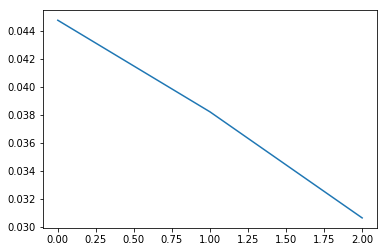

In [57]:
#show loss_or acc
plt.plot(model_log.history['val_loss'])

In [ ]:
_